# TIME SERIES ANALYSIS

**ARIMA**

    

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from arch.unitroot import PhillipsPerron,KPSS,ADF

**DATASET**
<br>
Dataset used here is the 2019 data of daily electricity consumption (in MWh) in each state in India. We want to forecast energy needs in the future.


In [3]:
data=pd.read_csv('dataset_tk.csv')
data

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,27/12/2019 00:00:00,103.7,110.4,211.4,63.8,229.9,33.4,29.3,44.2,3.8,...,79.8,112.0,1.7,2.0,20.1,2.6,5.8,2.0,2.1,3.4
355,28/12/2019 00:00:00,97.2,101.7,212.7,62.0,234.2,32.7,27.6,47.7,3.4,...,75.8,108.3,1.6,2.0,19.7,2.5,6.0,1.7,2.1,3.4
356,29/12/2019 00:00:00,237.2,214.1,232.7,128.5,421.3,42.0,29.9,40.0,6.4,...,95.7,166.9,1.0,2.0,34.2,2.4,5.3,1.7,2.1,4.9
357,30/12/2019 00:00:00,251.9,220.1,246.5,126.9,437.4,43.3,31.6,42.8,6.4,...,99.2,173.9,1.1,2.3,35.0,2.4,5.6,1.8,2.1,4.9


In [4]:
data[['Date','Time']] = data['Unnamed: 0'].str.split(expand=True)
data.drop(columns=['Unnamed: 0'])

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,Date,Time
0,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,...,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4,02/01/2019,00:00:00
1,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,...,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6,03/01/2019,00:00:00
2,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,...,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5,04/01/2019,00:00:00
3,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,...,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5,05/01/2019,00:00:00
4,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,68.1,...,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3,06/01/2019,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,103.7,110.4,211.4,63.8,229.9,33.4,29.3,44.2,3.8,75.8,...,1.7,2.0,20.1,2.6,5.8,2.0,2.1,3.4,27/12/2019,00:00:00
355,97.2,101.7,212.7,62.0,234.2,32.7,27.6,47.7,3.4,74.2,...,1.6,2.0,19.7,2.5,6.0,1.7,2.1,3.4,28/12/2019,00:00:00
356,237.2,214.1,232.7,128.5,421.3,42.0,29.9,40.0,6.4,78.9,...,1.0,2.0,34.2,2.4,5.3,1.7,2.1,4.9,29/12/2019,00:00:00
357,251.9,220.1,246.5,126.9,437.4,43.3,31.6,42.8,6.4,83.8,...,1.1,2.3,35.0,2.4,5.6,1.8,2.1,4.9,30/12/2019,00:00:00


We will use this data to forecast energy need of <b>Tamil Nadu</b>

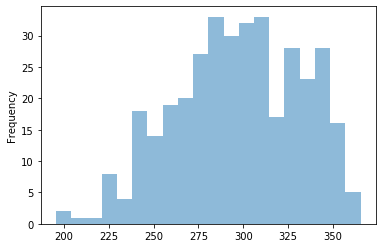

In [5]:
data['Tamil Nadu'].plot.hist(bins=20,alpha=0.5)

In [6]:
print(data['Tamil Nadu'].describe())
print('Kurtosis:',data['Tamil Nadu'].kurtosis())
print('Skewness:',data['Tamil Nadu'].skew())
print("Mean+3sd=",data['Tamil Nadu'].mean()+3*data['Tamil Nadu'].std())
print("Mean-3sd=",data['Tamil Nadu'].mean()-3*data['Tamil Nadu'].std())

count    359.000000
mean     297.270752
std       35.202116
min      195.700000
25%      273.250000
50%      298.400000
75%      325.900000
max      365.300000
Name: Tamil Nadu, dtype: float64
Kurtosis: -0.6163897836251153
Skewness: -0.24152303448216253
Mean+3sd= 402.8770990563306
Mean-3sd= 191.66440512194256


Since this data is the 2019 data we will use our model to check forecasting for electricity consumption after <b>15-Dec-2019</b> i.e. last 16 days. Data is already sorted in chronological order.

In [7]:
ind=data.index[data['Date']=='15/12/2019'][0]

In [9]:
data_train=data.loc[0:ind][['Date','Tamil Nadu']]
data_train

,Date,Tamil Nadu
0,02/01/2019,268.3
1,03/01/2019,285.2
2,04/01/2019,270.3
3,05/01/2019,286.8
4,06/01/2019,298.3
...,...,...
338,11/12/2019,296.1
339,12/12/2019,302.7
340,13/12/2019,303.5
341,14/12/2019,296.5


In [11]:
data_test=data.loc[ind+1:][['Date','Tamil Nadu']]
data_test

,Date,Tamil Nadu
343,16/12/2019,310.0
344,17/12/2019,311.9
345,18/12/2019,315.1
346,19/12/2019,324.0
347,20/12/2019,307.8
348,21/12/2019,296.6
349,22/12/2019,258.0
350,23/12/2019,274.8
351,24/12/2019,278.4
352,25/12/2019,287.5


In [12]:
data_train=data_train['Tamil Nadu']
data_test=data_test['Tamil Nadu']

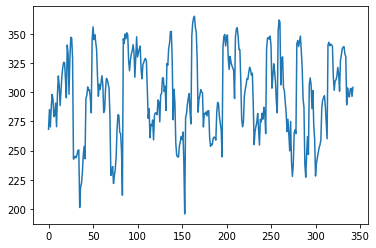

In [13]:
plt.plot(data_train)

**CHECK FOR STATIONARITY**

<b>Augmented Dickey-Fuller test</b>

In [14]:
adf_test = ADF(data_train)
print(adf_test.summary)
if adf_test.stat < adf_test.critical_values["5%"]:
    print ("Null hypothesis is rejected : Time Series is Stationary")
else:
    print ("Fail to reject null hypothesis : Time Series is Non-Stationary")

<bound method UnitRootTest.summary of <class 'arch.unitroot.unitroot.ADF'>
"""
   Augmented Dickey-Fuller Results   
Test Statistic                 -5.901
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
""">
Null hypothesis is rejected : Time Series is Stationary


<b>Philips-Perron test</b>

In [15]:
pp_test = PhillipsPerron(data_train)
print(pp_test.summary)
if pp_test.stat < pp_test.critical_values["5%"]:
    print ("Null hypothesis is rejected : Time Series is Stationary")
else:
    print ("Fail to reject null hypothesis : Time Series is Non-Stationary")

<bound method UnitRootTest.summary of <class 'arch.unitroot.unitroot.PhillipsPerron'>
"""
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -5.729
P-value                         0.000
Lags                               17
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
""">
Null hypothesis is rejected : Time Series is Stationary


<b>Kwiatkowski-Philips-Schmidt-Shin (KPSS) test</b>

In [16]:
kpss_test = KPSS(data_train)
print(kpss_test.summary)
if kpss_test.stat < kpss_test.critical_values["5%"]:
    print ("Fail to reject null hypothesis : Time Series is Stationary")
else:
    print ("Null hypothesis is rejected: Time Series is Non-Stationary")

<bound method UnitRootTest.summary of <class 'arch.unitroot.unitroot.KPSS'>
"""
    KPSS Stationarity Test Results   
Test Statistic                  0.055
P-value                         0.843
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
""">
Fail to reject null hypothesis : Time Series is Stationary


Since all three tests confirm stationarity of our data, we go ahead with building an <b>ARMA</b> model

**<b>ARMA</b> model(using <b>AIC</b>)**

Due to lack of computation power, I will restrict my search for p and q between 1 and 6

In [18]:
warnings.simplefilter('ignore')
model = ARMA(data_train, order = (1,1))
model_AIC = model.fit(disp=-1)
min_AIC=model_AIC.aic
aic_p=1
aic_q=1
for i in range(0,6):
    for j in range(0,6):
        try:
            arma_model = ARMA(data_train,order=(i+1,j+1))
            model_AIC = arma_model.fit(disp=-1)
            if model_AIC.aic<min_AIC:
                min_AIC=model_AIC.aic
                aic_p=i+1
                aic_q=j+1
        except:
            continue
print("The opitmum value of (p.q) using AIC is (",aic_p,',',aic_q,')')
print("Minimum AIC value is ",min_AIC)

The opitmum value of (p.q) using AIC is ( 6 , 4 )
Minimum AIC value is  3036.079973206308


In [19]:
model = ARMA(data_train, order=(aic_p,aic_q))  
model_AIC = model.fit(disp=-1)  
print(model_AIC.summary())

                              ARMA Model Results                              
Dep. Variable:             Tamil Nadu   No. Observations:                  343
Model:                     ARMA(6, 4)   Log Likelihood               -1506.040
Method:                       css-mle   S.D. of innovations             19.218
Date:                Sun, 04 Oct 2020   AIC                           3036.080
Time:                        23:37:13   BIC                           3082.133
Sample:                             0   HQIC                          3054.424
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              297.7904      0.586    508.074      0.000     296.642     298.939
ar.L1.Tamil Nadu     0.3677        nan        nan        nan         nan         nan
ar.L2.Tamil Nadu     0.3269 

**MODEL PLOT**

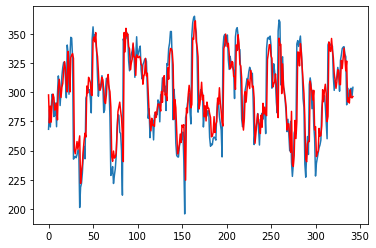

In [20]:
plt.plot(data_train)
plt.plot(model_AIC.fittedvalues, color='red')

**FORECAST**

In [22]:
forecast_aic=model_AIC.forecast(steps=16)[0]
RMSE=(sum((data_test-forecast_aic)**2))**0.5/16
print("The root mean square error of the above model is ",RMSE)


The root mean square error of the above model is  6.562945064010082


<b>Forecast Plot</b>

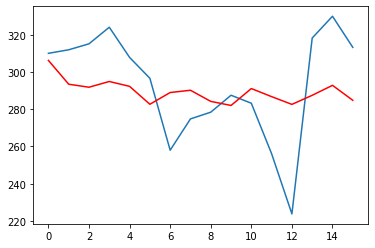

In [23]:
plt.plot(data_test.to_numpy())
plt.plot(forecast_aic, color='red')

**ARMA model (using BIC)**

In [24]:
model = ARMA(data_train, order = (1,1))
results_ARMA = model.fit(disp=-1)
min_BIC=results_ARMA.bic
bic_p=1
bic_q=1
for i in range(0,6):
    for j in range(0,6):
        try:
            arma_model = ARMA(data_train,order=(i+1,j+1))
            results_ARMA = arma_model.fit(disp=-1)
            if results_ARMA.bic<min_BIC:
                min_BIC=results_ARMA.bic
                bic_p=i+1
                bic_q=j+1
        except:
            continue
print("The opitmum value of (p.q) using BIC is (",bic_p,',',bic_q,')')
print("Minimum BIC value is ",min_BIC)

The opitmum value of (p.q) using BIC is ( 1 , 1 )
Minimum BIC value is  3068.942244944971


In [25]:
model = ARMA(data_train, order=(bic_p,bic_q))  
model_BIC = model.fit(disp=-1)  
print(model_BIC.summary())

                              ARMA Model Results                              
Dep. Variable:             Tamil Nadu   No. Observations:                  343
Model:                     ARMA(1, 1)   Log Likelihood               -1522.796
Method:                       css-mle   S.D. of innovations             20.473
Date:                Sun, 04 Oct 2020   AIC                           3053.591
Time:                        23:42:01   BIC                           3068.942
Sample:                             0   HQIC                          3059.706
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              297.2066      5.698     52.159      0.000     286.038     308.375
ar.L1.Tamil Nadu     0.7999      0.040     20.173      0.000       0.722       0.878
ma.L1.Tamil Nadu     0.0434 

**MODEL PLOT**

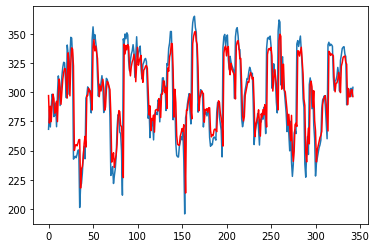

In [26]:
plt.plot(data_train)
plt.plot(model_BIC.fittedvalues, color='red')

**FORECAST**

In [27]:
forecast_bic=model_BIC.forecast(steps=16)[0]
RMSE=(sum((data_test-forecast_bic)**2))**0.5/16
print("The root mean square error of the above model is ",RMSE)

The root mean square error of the above model is  7.078389938673698


<b>Forecast Plot</b>

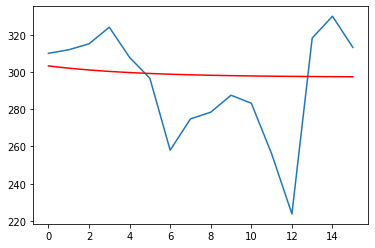

In [28]:
plt.plot(data_test.to_numpy())
plt.plot(forecast_bic, color='red')